# Taylor series as the building block for flow models
*Chiel van Heerwaarden (chielvanheerwaarden@gmail.com), 2018*

In this assignment, you will learn the basics of solving ordinary differential equations using numerical integration. At the end of this tutorial, you will be able to:
* Discretize an ordinary differential equation using explicit, implicit, or multistep methods
* Appreciate the pros and cons of each method

## Introduction
The abstract definition of an ordinary differential equation of variable $h\left( t \right)$ is

$$ \dfrac{dh}{dt} = f \left( t, h \left( t \right) \right),$$

which states that the change of $h$ in time $t$ is a function of $h$ itself and the time $t$.

In this tutorial, we focus on the water level $h\left( t \right)$ in a reservoir, which is described by the ordinary differential equation

$$ \dfrac{dh}{dt} = - \alpha\,h \left( t \right) + P \left( t \right) - E \left( t \right),$$

where $\alpha$ is a coefficient, and $P$ and $E$ are precipitation and evaporation respectively. Before treating the problem at its full complexity, we study the evolution of the water level in a reservoir that has no precipitation or evaporation with the simplified equation

$$ \dfrac{dh}{dt} = - \alpha\,h \left( t \right) $$.

## Taylor series
Intuitively, the gradient $dh/dt$ can be approximated 

$$ \dfrac{dh}{dt} \approx \dfrac{h\left(t + \Delta t\right) - h \left( t \right)}
{\Delta t} $$

Formally, this approximation can be derived from a Taylor series around $t$, which permits the quantification of the error of the approximation

$$ h \left(t + \Delta t \right) 
= h \left( t \right) 
+ \dfrac{\left( \Delta t \right)  }{1!} \left. \dfrac{d  h}{dt  } \right|_t
+ \dfrac{\left( \Delta t \right)^2}{2!} \left. \dfrac{d^2h}{dt^2} \right|_t
+ \dfrac{\left( \Delta t \right)^3}{3!} \left. \dfrac{d^3h}{dt^3} \right|_t
+ \dots $$
___
<font color=red>
**Assignment 1**

* Rewrite the Taylor series above such that $dh/dt$ is on the left-hand side, and all other terms are on the right-hand side.
* Compare the outcome to the intuitive approximation. The difference between the two is the error of the approximation. What is the error (in symbolic math) in this case?
</span>

**Answer**

Work out your answer here.

In [7]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [8]:
# Global settings.
h0 = 1.
alpha = 1.
total_time = 5.

In [9]:
class h_euler_forward:
    def __init__(self, dt):
        self.dt = dt
        self.time = np.arange(0, total_time, dt)
        self.h_ref = h0*np.exp(-alpha*self.time)
        self.h = np.zeros(self.h_ref.size)
        self.h[0] = h0
        
        time = 0
        h = h0
        for i in range(1, self.time.size):
            time += dt
            dhdt = -alpha*h
            h += dt*dhdt
            self.h[i] = h
        
        self.L1_error = dt*np.sum(abs(self.h - self.h_ref))
        self.L2_error = dt*np.sum((self.h - self.h_ref)**2)**.5

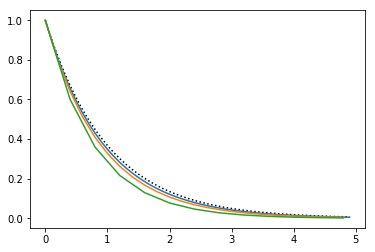

In [10]:
ef1 = h_euler_forward(0.1)
plt.plot(ef1.time, ef1.h_ref, 'k:')
plt.plot(ef1.time, ef1.h, 'C0-')

ef2 = h_euler_forward(0.2)
plt.plot(ef2.time, ef2.h, 'C1-')

ef4 = h_euler_forward(0.4)
plt.plot(ef4.time, ef4.h, 'C2-')

In [18]:
dt = np.array([ef1.dt, ef2.dt, ef4.dt])
L1_error = np.array([ef1.L1_error, ef2.L1_error, ef4.L1_error])
L2_error = np.array([ef1.L2_error, ef2.L2_error, ef4.L2_error])

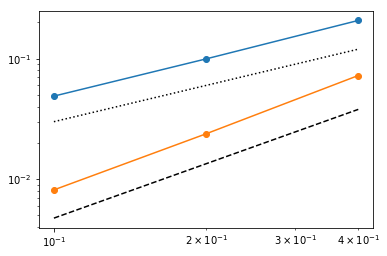

In [21]:
plt.loglog(dt, L1_error, 'C0o-')
plt.loglog(dt, L2_error, 'C1o-')
plt.loglog(dt, 0.3*dt, 'k:')
plt.loglog(dt, 0.15*dt**1.5, 'k--');